# 01_idamax_vectorization

Write a Python program that generates a large random vector and implements two functions:

1. A loop-based version of idamax that scans through all elements and returns the index of the element with the maximum absolute value.

2. A vectorized NumPy version that achieves the same result without explicit Python loops.Compare both functions in terms of correctness and execution time. Plot timing results for multiple vector sizes.



In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(42)
n = 10000000 # 10^7
x = np.random.randn(n)

# Function to get Index of element with max absolute value using python loop
def py_maxIndex(x):
    max_val = 0.0
    max_index = -1
    for i, val in enumerate(x):
        abs_val = abs(val)
        if abs_val > max_val:
            max_val = abs_val
            max_index = i
    return max_index

# Function to get Index of element with max absolute value using NumPy
def np_maxIndex(x):
    y = np.abs(x)
    return np.argmax(y)

index_py = py_maxIndex(x)
index_np = np_maxIndex(x)

# Check
print('Python Index =', index_py)
print('Numpy Index =', index_np)

if index_py == index_np:
    print('Check: Same Index')

# Execution Time Calculation for different vector sizes 10^3 - 10^9
vec_sizes = [10**k for k in range(3,9)]
py_time = []
np_time = []

for n in vec_sizes:
    x = np.random.randn(n)

    start = time.perf_counter()
    py_maxIndex(x)
    end = time.perf_counter()
    py_time.append(end - start)

    start = time.perf_counter()
    np_maxIndex(x)
    end = time.perf_counter()
    np_time.append(end - start)


Python Index = 5069085
Numpy Index = 5069085
Check: Same Index


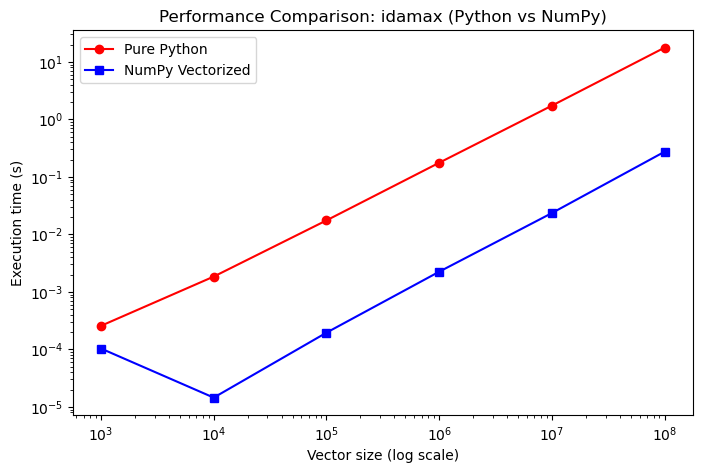

In [14]:
# Perfomance Plot

plt.figure(figsize=(8,5))
plt.loglog(vec_sizes, py_time, 'r-o', label='Pure Python')
plt.loglog(vec_sizes, np_time, 'b-s', label='NumPy Vectorized')
plt.xlabel("Vector size (log scale)")
plt.ylabel("Execution time (s)")
plt.title("Performance Comparison: idamax (Python vs NumPy)")
plt.legend()
plt.show()

# Discussion

- The results show that the NumPy implementation is much faster than the pure Python version, especially for larger vector sizes. This is because NumPy uses optimized C/BLAS routines internally, while Python loops run element by element in the interpreter. Both methods give the same result, but NumPy achieves it in a fraction of the time.